# Seildurchhang

![](zusatz_photos/Seil.svg)

Beim Bauen mit Seilen muss man den Seildurchhang $f$ immer beachten. Dieser ist im idealisierten Fall abhängig von der Spannweite $L$, der auf das Seil wirkenden Kraft $q$ und den horizontalen Kräften $H$ an den Auflagern.

$$
f = \frac{ q \cdot L^2}{ 8 \cdot H }
$$

Die tatsächliche Seillänge $S$ hängt vom Stich $f$ und der Spannweite $L$ ab.

$$
S = L + \frac{8 \cdot f^2}{3 \cdot L} - \frac{32 \cdot f^4}{5 \cdot L^3}
$$

## Aufgabenteil A

Schreiben Sie zwei Funktionen, eine die den Stich und eine die die tatsächlich Seillänge ermittelt.  

Ermitteln Sie für ein $q = 10~kN/m$, $L = 20~m$ und $H = 200~kN$ den Stich und die tatsächliche Seillänge.


In [16]:
q = 10
L = 20
H = 200

def stich(q, L, H):
    return q * L ** 2 / 8 / H

def seillaenge(f, L):
    return L + (8 * f **2) / (3 * L) - (32 * f **4) / (5 * L**3)

f = stich(10, 20, 200)
s = seillaenge(f, L)

print(f"Der Stich beträgt {f:0.2f} m und die Seillänge {s:0.2f} m")

Der Stich beträgt 2.50 m und die Seillänge 20.80 m


## Aufgabenteil B
In bestimmten Fällen ist es wichtig den Seildurchhang zu begrenzen. Ein Szenario wäre z.B. bei Skiliften zu verhindern, dass eine Gondel den Boden berührt, falls eine Aufhängung versagt.

Um den Durchhang zu reduzieren muss entweder die Spannweite verringert, oder die Horizontale Kraft erhöht werden. 

Es soll eine Stromtrasse von $1000~m$ angelegt werden. Hierbei darf der Durchhang maximal $3~m$ betragen. Jede Stütze kostet $10.000$€ und für jedes $1~kN$, welches die Endauflager aufnehmen müssen, steigen die Kosten um $500$€. Die konstante Last $q$ beträgt $10~kN/m$.

Berechnen Sie die Anzahl an Stützen, bei denen die Kosten am geringsten sind. Geben Sie die Kosten, den Stich, die H-Kraft und die Spannweite zwischen zwei Stützen aus.

### Lösungshinweis
Es kann davon ausgegangen werden, dass bei einer Spannweite von weniger als $10~m$ mit einem Unwirtschaftlichen Ergebnis zu rechnen ist.

### Lösung

In [17]:
f = 3
q = 10
gesamt_laenge = 1000

def berechnung_kosten(stuetzen):
    L = gesamt_laenge / (stuetzen - 1)
    H = q * L ** 2 / 8 / f # Die umgestellte Funktion 'Stich'
    k = stuetzen * 10000 + 2 * H * 500 # 2 * H da auf beiden Seiten Auflager sind
    return k, L, H

for stuetzen in range(2, 1000 // 10 + 2): # 2 Stützen sind immer vorhanden
    k1, L, H = berechnung_kosten(stuetzen)
    k2, _, _ = berechnung_kosten(stuetzen + 1) # Nur das erste Ergebnis ist wichtig
    if k1 <= k2:
       print(f"Kosten: {k1:.2f} €, Stützen: {stuetzen}, Länge: {L:.2f} m, Kraft: {H:.2f} kN")
       break

Kosten: 665220.39 €, Stützen: 45, Länge: 22.73 m, Kraft: 215.22 kN


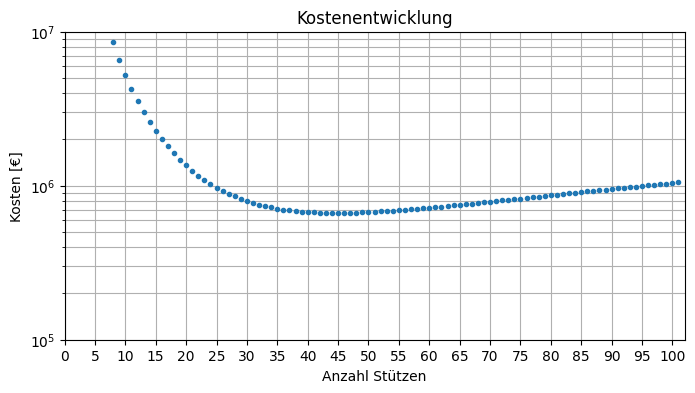

In [18]:
import matplotlib.pyplot as plt

stuetzen = list(range(2, 1000 // 10 + 2))
kosten = []
for s in stuetzen:
    k, _, _ = berechnung_kosten(s)
    kosten.append(k)

plt.figure(figsize=(8,4))
plt.plot(stuetzen, kosten, ".")
plt.semilogy()
plt.title(label="Kostenentwicklung")
plt.xlabel("Anzahl Stützen")
plt.ylabel("Kosten [€]")
plt.ylim(10**5, 10**7)
plt.xlim(0, 1000 // 10 + 2)
plt.grid(which = "both")
plt.xticks(range(0, 1000 // 10 + 2, 5))
plt.show()